In [1]:
MODEL_NAME = 'ResNet'

In [2]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from model import Network, SimpleNET, ResNet

if MODEL_NAME == 'ResNet':
    from config.ResNet_config_aug import *
else:
    from config.baseline_config import *
    
from augmentation import * # transforms_0, transforms_1, transforms_1_test, transforms_2, transforms_2_test
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
TRANSFORMS[2:]

[Compose(
     Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=True)
     AutoAugment(policy=AutoAugmentPolicy.IMAGENET, fill=None)
     ToTensor()
 )]

In [4]:
NUM_EPOCHS = 25
for iteration in range(5):
    for i, (transform, test_transform) in enumerate(zip(TRANSFORMS[2:], TEST_TRANSFORMS[2:])):
        trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transform)
        train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=16)

        testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=test_transform)
        test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=16)

        model = ResNet(n_features=CONV_SIZE, num_res_blocks=NUM_BLOCKS)

        model.to(device)
        loss = nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=DECAY_RATE)

        out_dict_adam = train(model, train_loader, test_loader, loss, optimizer, NUM_EPOCHS)

        # saving results
        augs = ['auto_augmentation']#] ['no augmentation', 'custom_augmentation', 'auto_augmentation']
        optim = 'Adam'
        d = out_dict_adam
        if MODEL_NAME == 'ResNet':
            filename = f'results/AUG/{MODEL_NAME}/{CONV_SIZE}_kernel_{NUM_BLOCKS}_blocks_{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim}_optim_{DROP_OUT_RATE}_dropout_{WEIGHT_DECAY}_decay_{augs[i]}_{iteration}_iter.csv'
        else:
            filename = f'results/AUG/{MODEL_NAME}/{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim}_optim_{augs[i]}_{iteration}_iter.csv'
        with open(filename, 'w') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(d.keys())
            writer.writerows(zip(*d.values()))

  0%|          | 0/25 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.714	 test: 0.691	 Accuracy train: 49.2%	 test: 53.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.707	 test: 0.691	 Accuracy train: 51.0%	 test: 50.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.712	 test: 0.691	 Accuracy train: 51.0%	 test: 51.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.686	 test: 0.681	 Accuracy train: 55.2%	 test: 55.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.681	 test: 0.675	 Accuracy train: 56.5%	 test: 58.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.666	 test: 0.645	 Accuracy train: 58.4%	 test: 66.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.657	 test: 0.654	 Accuracy train: 61.5%	 test: 63.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.657	 test: 0.650	 Accuracy train: 62.1%	 test: 65.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.651	 test: 0.651	 Accuracy train: 63.6%	 test: 64.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.646	 test: 0.649	 Accuracy train: 62.2%	 test: 64.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.637	 test: 0.653	 Accuracy train: 65.1%	 test: 66.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.623	 test: 0.651	 Accuracy train: 66.3%	 test: 63.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.593	 test: 0.652	 Accuracy train: 71.3%	 test: 64.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.594	 test: 0.630	 Accuracy train: 71.0%	 test: 67.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.570	 test: 0.635	 Accuracy train: 73.2%	 test: 65.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.563	 test: 0.635	 Accuracy train: 72.9%	 test: 65.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.527	 test: 0.645	 Accuracy train: 78.0%	 test: 62.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.519	 test: 0.674	 Accuracy train: 78.7%	 test: 58.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.496	 test: 0.642	 Accuracy train: 81.1%	 test: 64.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.475	 test: 0.623	 Accuracy train: 82.4%	 test: 67.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.457	 test: 0.647	 Accuracy train: 83.7%	 test: 63.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.454	 test: 0.644	 Accuracy train: 83.1%	 test: 63.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.433	 test: 0.651	 Accuracy train: 84.3%	 test: 62.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.416	 test: 0.646	 Accuracy train: 87.2%	 test: 64.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.409	 test: 0.628	 Accuracy train: 86.2%	 test: 66.0%


  0%|          | 0/25 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.697	 test: 0.685	 Accuracy train: 52.7%	 test: 63.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.690	 test: 0.676	 Accuracy train: 54.4%	 test: 62.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.682	 test: 0.679	 Accuracy train: 56.4%	 test: 63.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.688	 test: 0.675	 Accuracy train: 53.8%	 test: 72.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.682	 test: 0.668	 Accuracy train: 55.8%	 test: 71.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.670	 test: 0.653	 Accuracy train: 59.3%	 test: 67.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.656	 test: 0.637	 Accuracy train: 62.6%	 test: 71.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.648	 test: 0.644	 Accuracy train: 63.8%	 test: 71.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.645	 test: 0.627	 Accuracy train: 64.3%	 test: 71.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.642	 test: 0.617	 Accuracy train: 65.1%	 test: 70.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.628	 test: 0.611	 Accuracy train: 67.2%	 test: 71.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.625	 test: 0.609	 Accuracy train: 68.8%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.627	 test: 0.617	 Accuracy train: 67.9%	 test: 71.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.625	 test: 0.601	 Accuracy train: 66.9%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.614	 test: 0.605	 Accuracy train: 68.0%	 test: 72.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.619	 test: 0.606	 Accuracy train: 68.4%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.619	 test: 0.621	 Accuracy train: 67.5%	 test: 69.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.616	 test: 0.620	 Accuracy train: 67.5%	 test: 67.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.624	 test: 0.619	 Accuracy train: 68.1%	 test: 69.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.625	 test: 0.607	 Accuracy train: 68.3%	 test: 72.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.622	 test: 0.628	 Accuracy train: 68.8%	 test: 70.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.634	 test: 0.631	 Accuracy train: 67.2%	 test: 72.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.641	 test: 0.633	 Accuracy train: 66.8%	 test: 69.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.630	 test: 0.628	 Accuracy train: 67.8%	 test: 70.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.622	 test: 0.628	 Accuracy train: 70.0%	 test: 72.4%


  0%|          | 0/25 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.691	 test: 0.659	 Accuracy train: 55.2%	 test: 63.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.670	 test: 0.671	 Accuracy train: 58.9%	 test: 58.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.655	 test: 0.622	 Accuracy train: 61.4%	 test: 68.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.655	 test: 0.620	 Accuracy train: 61.8%	 test: 68.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.646	 test: 0.619	 Accuracy train: 64.4%	 test: 69.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.633	 test: 0.616	 Accuracy train: 64.7%	 test: 69.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.635	 test: 0.627	 Accuracy train: 66.1%	 test: 68.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.632	 test: 0.630	 Accuracy train: 66.4%	 test: 67.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.622	 test: 0.610	 Accuracy train: 66.4%	 test: 70.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.625	 test: 0.619	 Accuracy train: 65.9%	 test: 69.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.615	 test: 0.618	 Accuracy train: 68.4%	 test: 68.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.612	 test: 0.623	 Accuracy train: 68.8%	 test: 68.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.607	 test: 0.611	 Accuracy train: 67.8%	 test: 70.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.607	 test: 0.642	 Accuracy train: 68.0%	 test: 66.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.603	 test: 0.628	 Accuracy train: 69.1%	 test: 67.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.604	 test: 0.623	 Accuracy train: 68.2%	 test: 69.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.597	 test: 0.616	 Accuracy train: 69.3%	 test: 69.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.593	 test: 0.614	 Accuracy train: 69.4%	 test: 69.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.594	 test: 0.603	 Accuracy train: 68.9%	 test: 70.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.591	 test: 0.601	 Accuracy train: 69.9%	 test: 69.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.574	 test: 0.607	 Accuracy train: 71.5%	 test: 69.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.594	 test: 0.608	 Accuracy train: 70.1%	 test: 69.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.572	 test: 0.623	 Accuracy train: 73.2%	 test: 67.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.577	 test: 0.620	 Accuracy train: 70.2%	 test: 67.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.583	 test: 0.623	 Accuracy train: 70.3%	 test: 67.8%


  0%|          | 0/25 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.719	 test: 0.689	 Accuracy train: 49.7%	 test: 56.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.720	 test: 0.655	 Accuracy train: 51.1%	 test: 68.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.676	 test: 0.637	 Accuracy train: 57.8%	 test: 68.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.671	 test: 0.625	 Accuracy train: 59.4%	 test: 70.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.658	 test: 0.701	 Accuracy train: 59.9%	 test: 70.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.649	 test: 0.612	 Accuracy train: 63.2%	 test: 70.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.637	 test: 0.607	 Accuracy train: 64.4%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.638	 test: 0.674	 Accuracy train: 65.3%	 test: 71.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.634	 test: 0.615	 Accuracy train: 66.1%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.632	 test: 0.624	 Accuracy train: 66.5%	 test: 68.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.630	 test: 0.596	 Accuracy train: 66.7%	 test: 71.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.635	 test: 0.612	 Accuracy train: 64.8%	 test: 71.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.641	 test: 0.609	 Accuracy train: 66.3%	 test: 70.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.639	 test: 0.604	 Accuracy train: 64.8%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.648	 test: 0.604	 Accuracy train: 66.1%	 test: 71.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.638	 test: 0.607	 Accuracy train: 66.0%	 test: 70.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.638	 test: 0.611	 Accuracy train: 64.9%	 test: 70.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.624	 test: 0.601	 Accuracy train: 66.9%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.627	 test: 0.602	 Accuracy train: 65.6%	 test: 71.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.635	 test: 0.607	 Accuracy train: 67.2%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.633	 test: 0.598	 Accuracy train: 66.5%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.630	 test: 0.601	 Accuracy train: 68.1%	 test: 71.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.616	 test: 0.593	 Accuracy train: 67.2%	 test: 71.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.617	 test: 0.589	 Accuracy train: 67.9%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.624	 test: 0.599	 Accuracy train: 67.5%	 test: 71.5%


  0%|          | 0/25 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.717	 test: 0.689	 Accuracy train: 48.9%	 test: 50.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.701	 test: 0.687	 Accuracy train: 50.9%	 test: 61.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.685	 Accuracy train: 51.3%	 test: 59.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.683	 Accuracy train: 52.0%	 test: 58.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.685	 Accuracy train: 51.4%	 test: 59.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.688	 test: 0.675	 Accuracy train: 52.9%	 test: 59.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.685	 test: 0.673	 Accuracy train: 55.0%	 test: 59.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.680	 test: 0.660	 Accuracy train: 57.8%	 test: 67.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.667	 test: 0.664	 Accuracy train: 60.6%	 test: 66.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.665	 test: 0.647	 Accuracy train: 61.7%	 test: 68.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.663	 test: 0.639	 Accuracy train: 62.2%	 test: 67.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.654	 test: 0.632	 Accuracy train: 64.3%	 test: 69.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.644	 test: 0.655	 Accuracy train: 66.1%	 test: 62.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.652	 test: 0.640	 Accuracy train: 64.4%	 test: 68.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.642	 test: 0.614	 Accuracy train: 66.0%	 test: 69.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.640	 test: 0.613	 Accuracy train: 66.3%	 test: 70.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.635	 test: 0.635	 Accuracy train: 65.6%	 test: 65.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.625	 test: 0.613	 Accuracy train: 67.5%	 test: 69.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.631	 test: 0.642	 Accuracy train: 66.3%	 test: 64.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.623	 test: 0.624	 Accuracy train: 66.9%	 test: 66.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.630	 test: 0.618	 Accuracy train: 66.8%	 test: 67.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.607	 test: 0.604	 Accuracy train: 69.4%	 test: 70.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.616	 test: 0.666	 Accuracy train: 68.5%	 test: 68.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.609	 test: 0.632	 Accuracy train: 68.5%	 test: 65.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.597	 test: 0.614	 Accuracy train: 69.2%	 test: 67.0%


ValueError: x and y must have same first dimension, but have shapes (50,) and (25,)

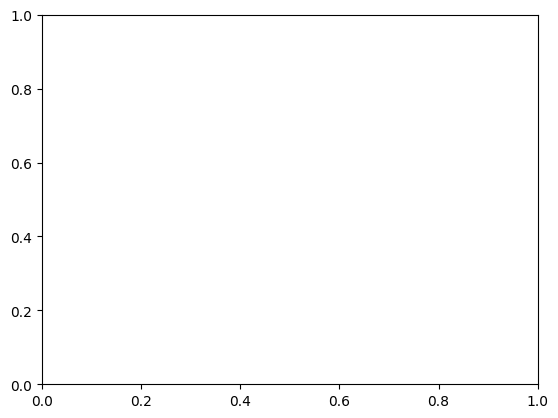

In [5]:
plt.plot([e for e in range(1, 50+1)], out_dict_adam['train_loss'], c='r', label='train')
plt.plot([e for e in range(1, 50+1)], out_dict_adam['test_loss'], c='b', label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5,1])
plt.legend()
plt.show()